In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np

# Load dataset
X, y = load_breast_cancer(return_X_y=True)

# Define model
model = LogisticRegression(max_iter=500)

# 5-Fold Cross-Validation
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("CV Scores:", scores)
print("Mean Accuracy:", np.mean(scores))
print("Std Dev:", np.std(scores))


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

CV Scores: [0.93859649 0.93859649 0.97368421 0.94736842 0.96460177]
Mean Accuracy: 0.9525694767893185
Std Dev: 0.014199631617252084


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Define model
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Define CV strategy
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Run CV
scores_rf = cross_val_score(model_rf, X, y, cv=cv, scoring='accuracy')
print("CV Scores (RF):", scores_rf)
print("Mean Accuracy:", np.mean(scores_rf))
print("Std Dev:", np.std(scores_rf))


CV Scores (RF): [0.94736842 0.98245614 0.96491228 0.9122807  0.94736842 0.96491228
 0.96491228 0.94736842 0.92982456 1.        ]
Mean Accuracy: 0.956140350877193
Std Dev: 0.023862228962693768


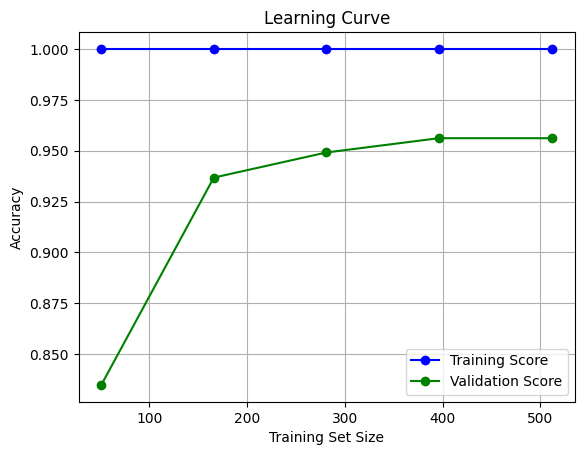

In [3]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Compute learning curve
train_sizes, train_scores, test_scores = learning_curve(
    model_rf, X, y, cv=cv, scoring='accuracy', n_jobs=-1
)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

# Plot learning curve
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score')
plt.plot(train_sizes, test_mean, 'o-', color='green', label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.grid(True)
plt.show()
